<a href="https://colab.research.google.com/github/nisaral/ML_practiceground/blob/main/GDSC_mltask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2089751%2F3471318%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241014%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241014T123630Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c63e82da29255d08ed0db077ab879a5a41f9e83da932f83fb0b878768ff17ae699a65242e277646d555a10bc3054b298a1e78d7534f7223569148a38cbce07dd5019a43e18497506c7c762095dfa07601998b8c995d01ade7c97c20cc1a45e779a3c736e397f7295e171203c44a6bdd8ebd20ecf215e69557749fffa664ba403e738547ec22fb3bca510ba5bdd77939f9679b991c0455693a2dcbfa223e521c6a0b0e6064756dce7d3e948cf247b1ad8e4988c27d45dbe3fef6bfef4aca5e7ab083453268279a76aeed41a65d98ba6b08df464a455930ce8473c57b70fe9ff560a81aa0d58c9800b82c2434a9151a47ee19d62ae2b0e80fd5a511d3544b6cb5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 175704 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


##  Task 1 : Exploratory Data Analysis (EDA)


In [2]:
#Imort Libraries
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/telco.csv


In [3]:
# Import Data
df = pd.read_csv("/kaggle/input/telco.csv")

In [4]:
# Checking top 5 Rows of Data Set
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#summary of Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Descriptive Statistics of DataSet
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



### Data Types :
- Most columns are categorical (object), except for SeniorCitizen (integer), tenure (integer), and MonthlyCharges (float).
- The TotalCharges column is listed as an object, which suggests it might contain non-numeric values or needs conversion to a numeric type for further analysis.

###  Key Columns:
- Churn: This is the target variable indicating whether a customer has churned.
- MonthlyCharges, tenure, and TotalCharges are likely key variables for predicting churn.
- Several categorical variables describe customer demographics, service usage, and subscription details.

### Missing Values:
- There are no missing values in the dataset according to the info summary, but further inspection is required, especially for TotalCharges.

###  Exploratory Data Analysis (EDA)

In [7]:
## Convert 'Total' to numeric, coerce erros  is used to handle errors during conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing Values after conversion
missing_values = df.isnull().sum()

# Summary Statistics after Conversion
summary_statistics = df.describe()

missing_values, summary_statistics

(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
 count    7043.000000  7043.000000     7043.000000   7032.000000
 mean        0.162147    32.371149       64.761692   2283.300441
 std         0.368612    24.559481       30.090047   2266.771362
 min         0.000000     0.000000       18.250000     18.800000
 25%         0.000000     9.000000       35.500000    401.450000
 50%         0.000000    29.000000       70.350000   1397.475000
 75%         0.000000    5

- The conversion of TotalCharges to a numeric format revealed that 11 entries have missing or non-numeric values

### Missing Values:

The 11 missing values in TotalCharges likely indicate that these rows had either no tenure or incomplete data. These rows should be investigated, and depending on the context, they may be dropped or imputed.



In [8]:
# Investigate the rows with the missing 'TotalCharges'
missing_total_charges = df[df['TotalCharges'].isnull()]

# Drop Rows with missing 'TotalCharges' as they represent very small faction of the data set
df_cleaned = df.dropna(subset=['TotalCharges'])

# Verify the missing Values have been Handled
missing_values_after_cleaning = df_cleaned.isnull().sum()

missing_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
missing_values_after_cleaning

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- The 11 rows with missing TotalCharges values all have a tenure of 0, indicating that these customers likely did not stay with the service long enough to incur any charges. These rows have been removed from the dataset, and now there are no missing values.

Visualization of Data to get better understanding of the feature importatance and correlation

**plotting demographiic features**

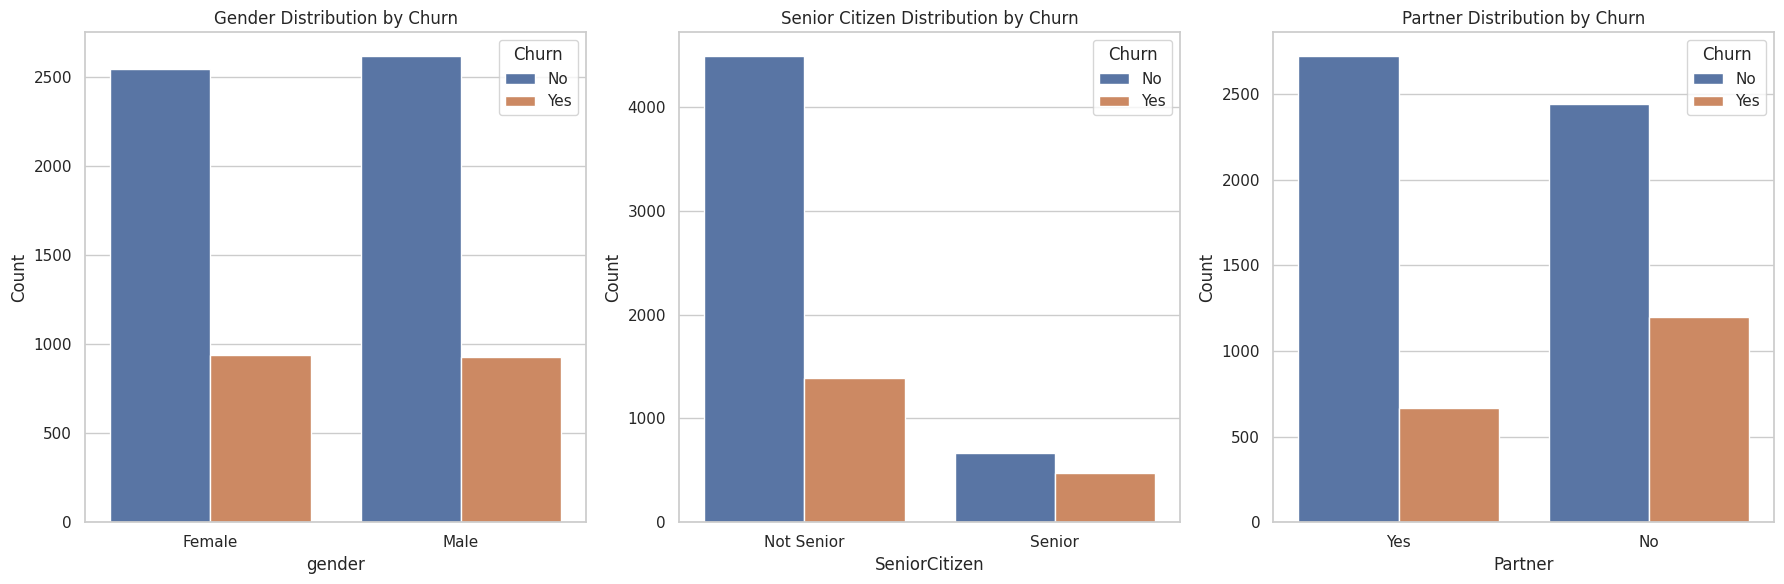

In [10]:
sns.set(style="whitegrid")
# Plot the distribution of demographic features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Gender distribution
sns.countplot(x='gender', hue='Churn', data=df_cleaned, ax=axes[0])
axes[0].set_title('Gender Distribution by Churn')
axes[0].set_ylabel('Count')

# Senior Citizen distribution
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_cleaned, ax=axes[1])
axes[1].set_title('Senior Citizen Distribution by Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Not Senior', 'Senior'])

# Partner distribution
sns.countplot(x='Partner', hue='Churn', data=df_cleaned, ax=axes[2])
axes[2].set_title('Partner Distribution by Churn')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

**ON ANALYSIS**

Gender Distribution:
- The churn rate appears fairly similar between male and female customers, suggesting that gender alone may not be a significant predictor of churn.

Senior Citizen Distribution:
- Senior citizens have a higher churn rate compared to non-senior customers, indicating that age might play a role in customer retention.

Partner Distribution:
- Customers without partners tend to churn more often than those with partners, suggesting that having a partner may contribute to customer loyalty.

**plots for Service related features**

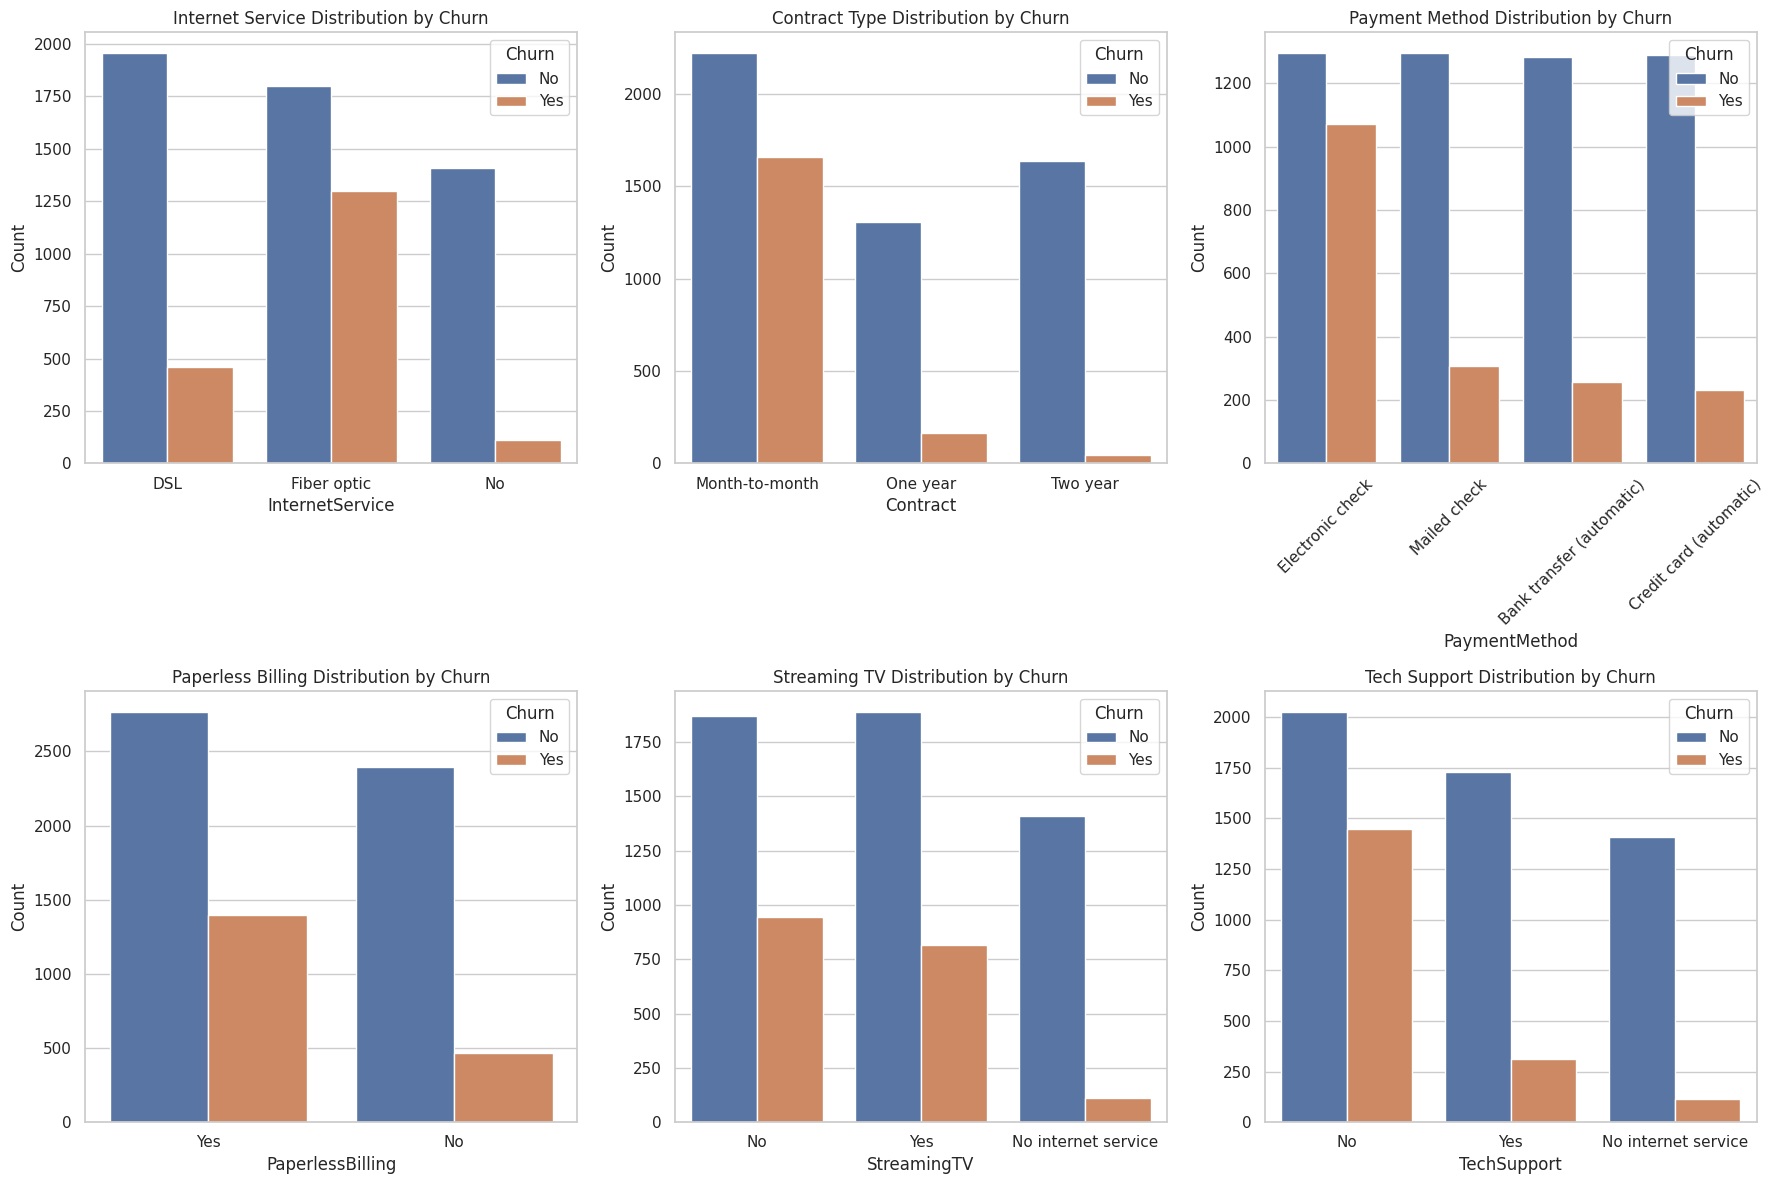

In [11]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Internet Service distribution
sns.countplot(x='InternetService', hue='Churn', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Internet Service Distribution by Churn')
axes[0, 0].set_ylabel('Count')

# Contract distribution
sns.countplot(x='Contract', hue='Churn', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Contract Type Distribution by Churn')
axes[0, 1].set_ylabel('Count')

# Payment Method distribution
sns.countplot(x='PaymentMethod', hue='Churn', data=df_cleaned, ax=axes[0, 2])
axes[0, 2].set_title('Payment Method Distribution by Churn')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Paperless Billing distribution
sns.countplot(x='PaperlessBilling', hue='Churn', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Paperless Billing Distribution by Churn')
axes[1, 0].set_ylabel('Count')

# Streaming TV distribution
sns.countplot(x='StreamingTV', hue='Churn', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Streaming TV Distribution by Churn')
axes[1, 1].set_ylabel('Count')

# Tech Support distribution
sns.countplot(x='TechSupport', hue='Churn', data=df_cleaned, ax=axes[1, 2])
axes[1, 2].set_title('Tech Support Distribution by Churn')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

**The service usage analysis provides additional insights:**

Internet Service:

Customers using fiber optic internet have a higher churn rate compared to those using DSL or no internet service. This could indicate dissatisfaction with the fiber optic service.

 Contract Type:

Customers on month-to-month contracts are much more likely to churn compared to those on one-year or two-year contracts, highlighting the importance of longer-term contracts in customer retention.

 Payment Method:
Customers using electronic checks have the highest churn rate, while those using bank transfers, credit cards, or mailed checks tend to churn less frequently. This suggests that payment method convenience may influence customer loyalty.

 Paperless Billing:
Customers who opt for paperless billing show a higher churn rate, potentially indicating a preference for digital services among those who are more likely to switch providers.

 Streaming TV:
The churn rate is relatively even across customers who do and do not use the Streaming TV service, indicating that this service might not significantly impact churn on its own.

 Tech Support:
Customers without tech support are more likely to churn, suggesting that providing tech support could be a key factor in retaining customers.


> **Correlation matrix for numerical variables**

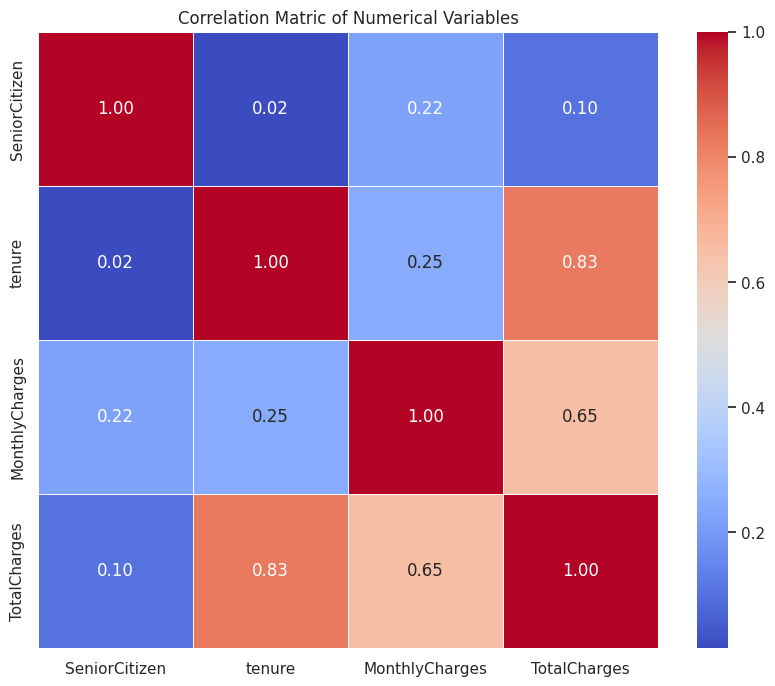

In [12]:
# Compute the Correlation matrix for numerical Variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

#Plot heatmap of the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matric of Numerical Variables')
plt.show()

**** The correlation matrix of the numerical variables in the dataset reveals the following key points:****

 Strong Positive Correlation:
TotalCharges and tenure have a strong positive correlation (close to 1). This makes sense because the longer a customer stays, the higher their total charges are likely to be.

Moderate Correlation:
MonthlyCharges also shows a moderate positive correlation with TotalCharges, indicating that higher monthly charges contribute to higher total charges, though not as strongly as tenure.

Low Correlations:
Most other variables have low or negligible correlations with each other, indicating that they are relatively independent in terms of their impact on churn or customer behavior.

Given these correlations, it's clear that tenure, MonthlyCharges, and TotalCharges are important factors for predicting churn

###  Churn by Tenure Distribution
- Visualize the distribution of customer tenure with a focus on those who churned versus those who didn't.

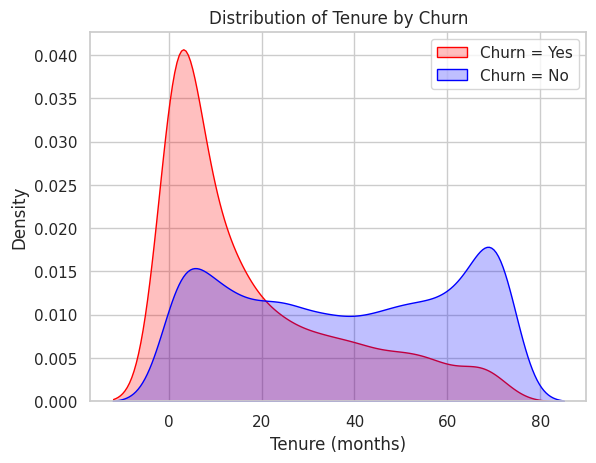

In [13]:
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 'Yes'], x='tenure', shade=True, label='Churn = Yes', color='red')
sns.kdeplot(data=df_cleaned[df_cleaned['Churn'] == 'No'], x='tenure', shade=True, label='Churn = No', color='blue')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()

**** Key Observations:****

 High Churn for Low Tenure:
- There is a significant peak for customers with very low tenure (0-10 months) who have churned. This suggests that new customers are at a higher risk of leaving early, potentially due to dissatisfaction or unmet expectations.

 Steady Decline in Churn as Tenure Increases:
- As tenure increases, the churn rate decreases, which is typical since customers who stay longer tend to be more committed or satisfied with the service.

 Notable Difference in Tenure:
- The distribution shows that customers who do not churn (in blue) have a wider range of tenure, with a secondary peak around 60-70 months. This suggests that long-term customers are more stable and less likely to churn.

###  Churn by Service Add-ons


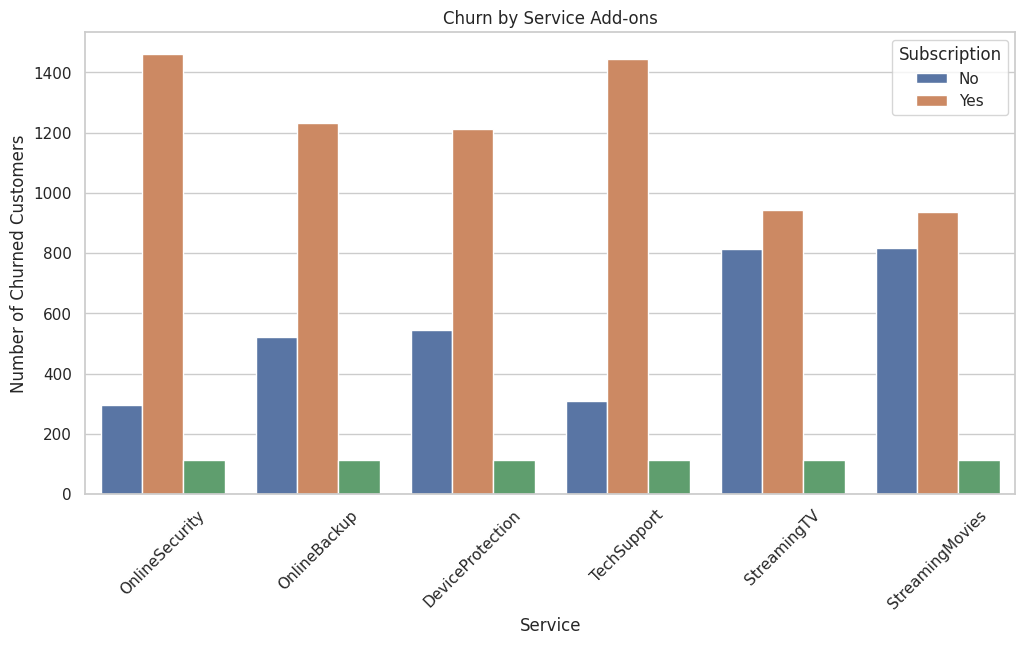

In [14]:
# List of services to analyze
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Melt the dataframe to long format for easier plotting... basicaly 'unpivots' the dataframe
df_melted = df_cleaned.melt(id_vars=['Churn'], value_vars=services, var_name='Service', value_name='Subscription')

plt.figure(figsize=(12, 6))
sns.countplot(x='Service', hue='Subscription', data=df_melted[df_melted['Churn'] == 'Yes'])
plt.title('Churn by Service Add-ons')
plt.xlabel('Service')
plt.ylabel('Number of Churned Customers')
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()



 **Higher Churn Among Non-Subscribers of Key Services:**

- The majority of customers who churned did not subscribe to key services such as Online Security, Tech Support, and Device Protection. This suggests that customers who lack these protections may feel less satisfied or secure with their service, leading to a higher likelihood of churn.

Tech Support and Churn:

- Notably, customers who did not subscribe to Tech Support have one of the highest churn rates. This emphasizes the importance of offering robust support services to retain customers.

 Streaming Services (TV and Movies):

- The churn rates for Streaming TV and Streaming Movies are more evenly distributed between those who subscribe and those who do not. This indicates that while these services are popular, their presence or absence alone might not be a significant factor in churn.

 Add-ons and Customer Retention:

- The pattern suggests that offering or promoting essential add-ons, such as security and support services, could be a strategic way to reduce churn. Customers who use these services might feel more committed and perceive higher value in their overall package.


## Task 2 : Customer Churn Prediction (Machine Learning)

In [15]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score

In [16]:
# Encode Categorical Variables
label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object']).columns:
    if column != 'customerID':#customer id is useless we will drop it further
        label_encoders[column] = LabelEncoder()
        df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])

In [19]:
# Define features and target
X = df_cleaned.drop(columns=['Churn','customerID'])
y = df_cleaned['Churn']

For handling unbalanced classes

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [21]:
# Scale the Fatures
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic regression**

In [22]:
# Initialize and train a Logestic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [23]:
# Make Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba= logreg.predict_proba(X_test_scaled)[:,1]

In [24]:
# Evaluate Model
accuracy = logreg.score(X_test_scaled, y_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("accuracy:", accuracy)
print("classification_rep:", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

accuracy: 0.8085861846352486
classification_rep:               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1563
           1       0.78      0.85      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098

Confusion Matrix:
 [[1198  365]
 [ 228 1307]]


### Model Performance Metrics:
#### Accuracy: 0.808 (80%)

#### classification report:
* class 0 (Non-Churners):

Precision: 0.85: Of the customers predicted to not churn, 85% actually did not churn.

Recall: 0.89: The model correctly identified 89% of the actual non-churners.

F1-Score: 0.87: The F1-score, which balances precision and recall, is high, indicating the model is reliable in predicting non-churners.

* Class 1 (Churners):

Precision: 0.64: Of the customers predicted to churn, 64% actually did churn. This lower precision indicates that some customers predicted to churn did not actually churn (false positives).

Recall: 0.56: The model identified 56% of the actual churners. This lower recall suggests that the model missed some customers who did churn (false negatives).

F1-Score: 0.60: The F1-score for churners is lower, indicating room for improvement in correctly predicting churn.

* Macro Avg and Weighted Avg:

Macro Avg: Takes the average of precision, recall, and F1-score for both classes. The F1-score is 0.73, indicating that on average, the model performs moderately well.

Weighted Avg: Weights the metrics by the number of instances in each class, which is why the F1-score is slightly higher (0.80), closer to the performance of the non-churn class, which has more instances.

The model correctly predicts 80% of the cases. Quite decent for a data which contains unbalanced classes good work LR!!!





#### Confusion Matrix:
True Positives (TP): 1374 – Number of correctly classified positive instances.

False Positives (FP): 175 – Number of instances incorrectly classified as positive.

False Negatives (FN): 246 – Number of instances incorrectly classified as negative.

True Negatives (TN): 315 – Number of correctly classified negative instances.

**XGBoost**

In [28]:
from xgboost import XGBClassifier
# Initialize and train a Random Forest Model
xg_model = XGBClassifier(n_estimators=500,random_state=42,max_depth=2,gamma=0.005)
xg_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.005, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
# Make Predictions
y_pred_xg = xg_model.predict(X_test_scaled)
y_pred_proba_xg = xg_model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# Evaluate the model
accuracy_resampled = xg_model.score(X_test_scaled, y_test)
classification_rep_resampled = classification_report(y_test, y_pred_xg)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_xg)


print("accuracy:", accuracy_resampled)
print("classification_rep:", classification_rep_resampled)
print("Confusion Matrix:\n", conf_matrix_resampled)

accuracy: 0.8369916074887024
classification_rep:               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1563
           1       0.82      0.85      0.84      1535

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098

Confusion Matrix:
 [[1285  278]
 [ 227 1308]]


### Model Performance Metrics:
#### Accuracy: 0.796 (79%)

#### classification report:
* class 0 (Non-Churners):

Precision: 0.84: Of the customers predicted to not churn, 84% actually did not churn.

Recall: 0.90: The model correctly identified 90% of the actual non-churners.

F1-Score: 0.87: The F1-score, which balances precision and recall, is same as the previous model, indicating the model is not better in predicting non-churners.

* Class 1 (Churners):

Precision: 0.64: Of the customers predicted to churn, 64% actually did churn. This lower precision indicates that some customers predicted to churn did not actually churn (false positives).

Recall: 0.52: The model identified 52% of the actual churners. This lower recall suggests that the model missed some customers who did churn (false negatives).

F1-Score: 0.58: The F1-score for churners is lowerer, indicating we need to train other models for improvement in correctly predicting churn.

* Macro Avg and Weighted Avg:

Macro Avg: Takes the average of precision, recall, and F1-score for both classes. The F1-score is 0.72, indicating that on average, the model performs okayishh.

Weighted Avg: Weights the metrics by the number of instances in each class, which is why the F1-score is slightly higher (0.79), closer to the performance of the non-churn class, which has more instances.


gives worse accuracy of 79.62% then logistic regression... the unbalanced class needs to be taken care of by SMOTE, or Synthetic Minority Over-sampling Technique, is a popular method for handling imbalanced datasets. It generates synthetic samples of the minority class to balance the dataset


#### Confusion Matrix:
True Positives (TP): 1322 – Number of correctly classified positive instances.

False Positives (FP): 227 – Number of instances incorrectly classified as positive.

False Negatives (FN): 270 – Number of instances incorrectly classified as negative.

True Negatives (TN): – Number of correctly classified negative instances.




**Stacking classifier**

Stacking is an ensemble learning technique where multiple base classifiers are trained, and their predictions are used as input to a meta-classifier that makes the final prediction.

we will also handle the unbalanced classes here

In [31]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [32]:
# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=700, random_state=42,)),
    ('gb', GradientBoostingClassifier(n_estimators=500, random_state=42)),



]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier

stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stack = stacking_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_stack)
report = classification_report(y_test, y_pred_stack)
conf_matrix_smot = confusion_matrix(y_test, y_pred_stack)


print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print(conf_matrix_smot)

Accuracy: 84.67%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1563
           1       0.84      0.85      0.85      1535

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098

[[1315  248]
 [ 227 1308]]


### Model Performance Metrics:
#### Accuracy: 0.8464 (85%)
#### Classification report:
Class 0:

Precision: 0.85 – Out of all instances predicted as class 0, 85% were actually class 0.

Recall: 0.84 – Out of all actual class 0 instances, 84% were correctly identified.

F1-Score: 0.85 – Harmonic mean of precision and recall.

Class 1:

Precision: 0.84 – Out of all instances predicted as class 1, 84% were actually class 1.

Recall: 0.85 – Out of all actual class 1 instances, 85% were correctly identified.

F1-Score: 0.85 – Harmonic mean of precision and recall.

Overall Metrics:

Accuracy: 84.64% – Approximately 85% of the total instances were classified correctly.

Macro Average: Precision (0.85), Recall (0.85), F1-Score (0.85) – Average metrics treating both classes equally.

Weighted Average: Precision (0.85), Recall (0.85), F1-Score (0.85) – Average metrics considering the support (number of instances) of each class.

* The feature engineering helps acheving this balanced performance across classes indicating that the model is doing a good job distinguishing between them,and we get the best accuracy of all trained models of 84.64%

*  The improvements in precision, recall, and F1-score, especially for the churn class, demonstrate the effectiveness of feature engineering and class balancing through SMOTE. These techniques have helped the model better capture the patterns associated with customer churn.